In [98]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import statsmodels.formula.api as smf


In [99]:
with open('final/data.json', 'r') as file:
    data = json.load(file)

# Create an empty DataFrame
df = pd.DataFrame()

# Iterate over each company in the JSON data
for company, company_data in data.items():
    print("company", company)
    # Extract the desired values from the nested dictionaries
    mda_positive = company_data['2022']['mda']['avg_positive']
    mda_negative = company_data['2022']['mda']['avg_negative']
    mda_neutral = company_data['2022']['mda']['avg_neutral']
    risk_positive = company_data['2022']['risks']['avg_positive']
    risk_negative = company_data['2022']['risks']['avg_negative']
    risk_neutral = company_data['2022']['risks']['avg_neutral']
    stock_return = company_data['2022']['stock_return']
    
    # Create a dictionary with the values
    company_dict = {
        'mda_positive': mda_positive,
        'mda_negative': mda_negative,
        'mda_neutral': mda_neutral,
        'risk_positive': risk_positive,
        'risk_negative': risk_negative,
        'risk_neutral': risk_neutral,
        'stock_return': stock_return
    }
    
    # Add the dictionary as a row to the DataFrame
    df = pd.concat([df, pd.DataFrame(company_dict, index=[company])])


# Print the DataFrame
df

company AAPL
company CVX
company BRK
company ABT
company AMZN
company ABBV
company AVGO
company COST
company GOOG
company BAC
company MRK
company MSFT
company KO
company MCD
company META
company HD
company JPM
company JNJ
company LLY
company NVDA
company TSLA
company PG
company XOM
company PFE
company V
company PEP
company UNH
company TMO
company WMT


,mda_positive,mda_negative,mda_neutral,risk_positive,risk_negative,risk_neutral,stock_return
AAPL,0.922344,0.021101,0.056555,0.849809,0.020332,0.129858,-0.044337
CVX,0.946681,0.020833,0.032485,0.752186,0.021880,0.225935,0.013782
BRK,0.918771,0.026647,0.054581,0.863118,0.015599,0.121283,0.027728
ABT,0.756195,0.013546,0.230259,0.724898,0.021750,0.253352,-0.052979
AMZN,0.858847,0.021245,0.119908,0.837402,0.019851,0.142747,-0.135506
ABBV,0.819775,0.030891,0.149334,0.799627,0.031775,0.168598,0.021267
AVGO,0.854081,0.013698,0.132221,0.858743,0.015619,0.125638,-0.009982
COST,0.757271,0.024414,0.218315,0.779952,0.035218,0.184830,-0.040627
GOOG,0.820135,0.061711,0.118153,0.820178,0.015802,0.164021,-0.128125
BAC,0.821909,0.027249,0.150842,0.786673,0.018113,0.195214,-0.011008


In [100]:
# calcualte z score

mean_stock_return = df['stock_return'].mean()
std_stock_return = df['stock_return'].std()
df['z_score_stock_return'] = (df['stock_return'] - mean_stock_return) / std_stock_return

# Print the updated DataFrame
print(mean_stock_return)
print(std_stock_return)

-0.0012954862413793091
0.06328816444012679


In [101]:
def plot(x, y):
    # MDA positive vs. stock return
    # Create a scatter plot
    plt.scatter(df[x], df[y], label='Data')

    # Fit a linear regression model
    model = smf.ols(formula=f'{y} ~ {x}', data=df).fit()
    
    # Get the predicted values from the model
    predicted_values = model.predict(df[x])

    # Plot the line of best fit
    plt.plot(df[x], predicted_values, color='r', label='Line of Best Fit')

    # Add labels for each point
    for i, ticker in enumerate(df.index):
        plt.annotate(ticker, (df[x].iloc[i], df[y].iloc[i]))

    # Set labels and title
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'Scatter Plot: {x} vs. {y}')
    plt.legend()

    # Calculate evaluation metrics
    predicted_values = model.predict(df[x])
    r2 = model.rsquared
    adjusted_r2 = model.rsquared_adj
    mse = mean_squared_error(df[y], predicted_values)
    rmse = mean_squared_error(df[y], predicted_values, squared=False)
    mae = mean_absolute_error(df[y], predicted_values)

    # Print the evaluation metrics
    # print("R-squared:", r2)
    # print("Adjusted R-squared:", adjusted_r2)
    # print("Mean Squared Error (MSE):", mse)
    # print("Root Mean Squared Error (RMSE):", rmse)
    # print("Mean Absolute Error (MAE):", mae)
    print(model.summary())

    # Show the plot
    plt.show()

                             OLS Regression Results                             
Dep. Variable:     z_score_stock_return   R-squared:                       0.046
Model:                              OLS   Adj. R-squared:                  0.010
Method:                   Least Squares   F-statistic:                     1.289
Date:                  Sat, 27 May 2023   Prob (F-statistic):              0.266
Time:                          18:03:06   Log-Likelihood:                -39.964
No. Observations:                    29   AIC:                             83.93
Df Residuals:                        27   BIC:                             86.66
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -3.0189     

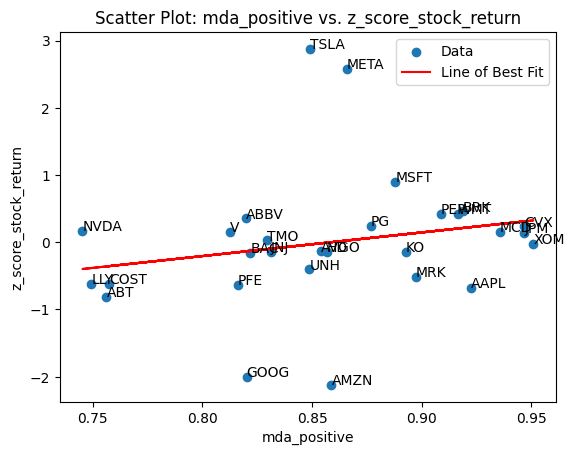

In [102]:
plot('mda_positive', 'z_score_stock_return')


                             OLS Regression Results                             
Dep. Variable:     z_score_stock_return   R-squared:                       0.020
Model:                              OLS   Adj. R-squared:                 -0.016
Method:                   Least Squares   F-statistic:                    0.5536
Date:                  Sat, 27 May 2023   Prob (F-statistic):              0.463
Time:                          18:03:07   Log-Likelihood:                -40.346
No. Observations:                    29   AIC:                             84.69
Df Residuals:                        27   BIC:                             87.43
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.3358     

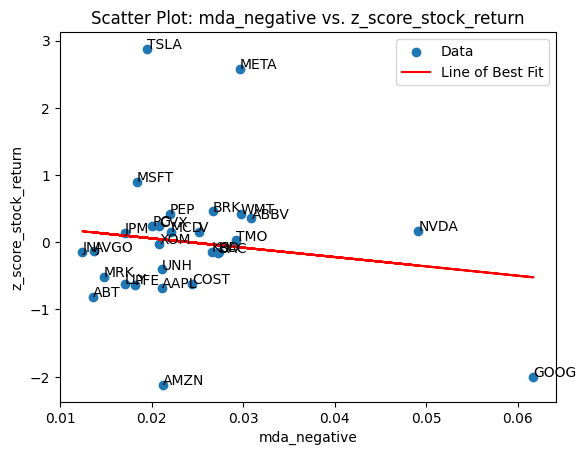

In [103]:
plot('mda_negative', 'z_score_stock_return')

                             OLS Regression Results                             
Dep. Variable:     z_score_stock_return   R-squared:                       0.038
Model:                              OLS   Adj. R-squared:                  0.002
Method:                   Least Squares   F-statistic:                     1.062
Date:                  Sat, 27 May 2023   Prob (F-statistic):              0.312
Time:                          18:03:08   Log-Likelihood:                -40.081
No. Observations:                    29   AIC:                             84.16
Df Residuals:                        27   BIC:                             86.90
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.3860      0.

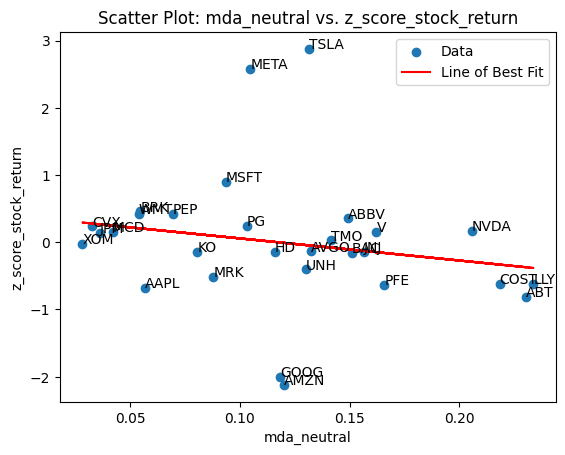

In [104]:
plot('mda_neutral', 'z_score_stock_return')

                             OLS Regression Results                             
Dep. Variable:     z_score_stock_return   R-squared:                       0.010
Model:                              OLS   Adj. R-squared:                 -0.027
Method:                   Least Squares   F-statistic:                    0.2628
Date:                  Sat, 27 May 2023   Prob (F-statistic):              0.612
Time:                          18:03:09   Log-Likelihood:                -40.500
No. Observations:                    29   AIC:                             85.00
Df Residuals:                        27   BIC:                             87.73
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.2656  

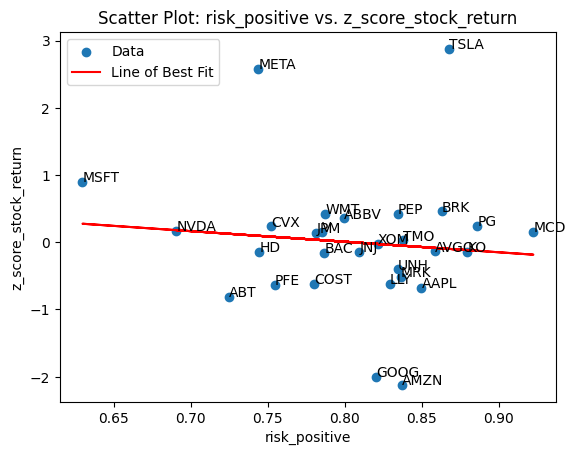

In [105]:
plot('risk_positive', 'z_score_stock_return')

                             OLS Regression Results                             
Dep. Variable:     z_score_stock_return   R-squared:                       0.116
Model:                              OLS   Adj. R-squared:                  0.083
Method:                   Least Squares   F-statistic:                     3.549
Date:                  Sat, 27 May 2023   Prob (F-statistic):             0.0704
Time:                          18:03:10   Log-Likelihood:                -38.850
No. Observations:                    29   AIC:                             81.70
Df Residuals:                        27   BIC:                             84.43
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.8963  

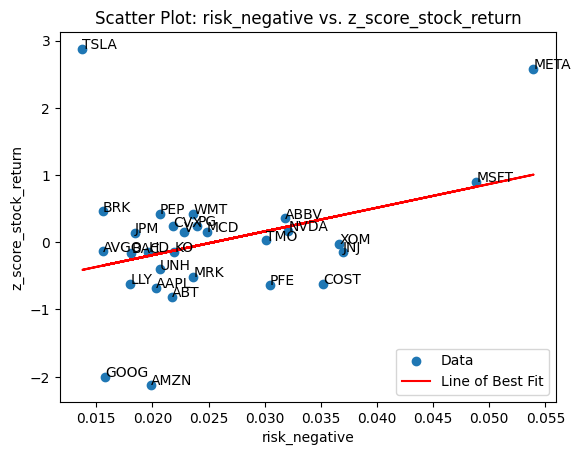

In [106]:
plot('risk_negative', 'z_score_stock_return')

                             OLS Regression Results                             
Dep. Variable:     z_score_stock_return   R-squared:                       0.002
Model:                              OLS   Adj. R-squared:                 -0.035
Method:                   Least Squares   F-statistic:                   0.06489
Date:                  Sat, 27 May 2023   Prob (F-statistic):              0.801
Time:                          18:03:11   Log-Likelihood:                -40.606
No. Observations:                    29   AIC:                             85.21
Df Residuals:                        27   BIC:                             87.95
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1431     

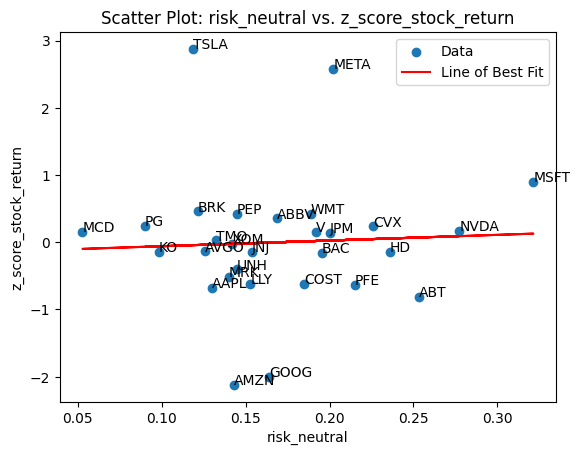

In [107]:
plot('risk_neutral', 'z_score_stock_return')